In [1]:
import preprocessing as pp
import modelling as md
import pandas as pd

# Regression Test

## Preprocessing

In [2]:
data = pd.read_csv('datasets/housing.csv')

In [3]:
field_types_raw = pp.get_input_types(data)

Modeling with field specifications:
RM: numeric
LSTAT: numeric
PTRATIO: numeric
MEDV: numeric


In [4]:
field_types = pp.normalize_col_names(data,field_types_raw)

column name changes
RM: rm
LSTAT: lstat
PTRATIO: ptratio
MEDV: medv


In [5]:
target='medv'

In [6]:
problem = pp.identify_problem_type(data,field_types,target)
print(problem)

regression


In [7]:
data_prop, field_types = pp.proper_dataframe(data,field_types,target,problem)

In [8]:
data_no_null,drop_cols = pp.handle_null_values(data_prop)

No null values found


In [9]:
data_no_null.head()

,rm,lstat,ptratio,medv
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [10]:
data_norm = pp.normalisation(data_no_null,target,field_types)

In [11]:
data_norm.shape

(489, 4)

In [12]:
count = pp.remove_outliers(data_norm,target,field_types)

In [13]:
print(count)

38


In [14]:
data_norm.shape

(451, 4)

In [15]:
data_pca,n = pp.pca_df(data_norm,target,field_types)
print(n)

0


In [16]:
pp.save_final_df(data_pca,'housing')

In [17]:
data_pca.head()

,rm,lstat,ptratio,medv
0,0.520554,-1.125077,-1.525083,504000.0
1,0.281048,-0.537070,-0.339748,453600.0
2,1.469245,-1.259357,-0.339748,728700.0
3,1.178417,-1.413427,0.086973,701400.0
4,1.410146,-1.075605,0.086973,760200.0


## Modelling

In [18]:
md.Linear_model(data_pca,target)

Mean Square Error = 7143458212.741232
Mean Absolute Erroe = 68042.55779464041
Coefficient Of Determination  = 0.5420948663388281

Mean Square Error = 5132539167.913235
Mean Absolute Erroe = 52169.131158487166
Coefficient Of Determination  = 0.7513156316999068

Mean Square Error = 4478787341.765231
Mean Absolute Erroe = 51872.92841477971
Coefficient Of Determination  = 0.6996511703402989

Mean Square Error = 5495627801.5811405
Mean Absolute Erroe = 58305.67210589143
Coefficient Of Determination  = 0.45443850377680506

Mean Square Error = 4300316654.896244
Mean Absolute Erroe = 51127.39139447738
Coefficient Of Determination  = 0.6103207835479437

Mean Square Error = 6605138113.499213
Mean Absolute Erroe = 65480.87855174071
Coefficient Of Determination  = 0.4429552967828069

Mean Square Error = 5235776362.236119
Mean Absolute Erroe = 48632.42024373121
Coefficient Of Determination  = 0.5871864983105195

Mean Square Error = 9871312108.641861
Mean Absolute Erroe = 74893.69574537851
Coefficie

{'mse': 5818880242.569102, 'mae': 58063.8219935693, 'R2': 0.5597584282979872}

In [19]:
md.Lasso_model(data_pca,target)

Best alpha = 0.19473684210526315
Mean Square Error = 4900017817.103583
Mean Absolute Erroe = 54596.38986973894
Coefficient Of Determination  = 0.5345265754230287

Mean Square Error = 5985647400.731803
Mean Absolute Erroe = 64089.4558357576
Coefficient Of Determination  = 0.45046293701224827

Mean Square Error = 4199782240.254267
Mean Absolute Erroe = 47294.8408719858
Coefficient Of Determination  = 0.6116572131181943

Mean Square Error = 7730387015.971079
Mean Absolute Erroe = 66766.54166044737
Coefficient Of Determination  = 0.5473972925174317

Mean Square Error = 4221579421.2871237
Mean Absolute Erroe = 53695.63674214063
Coefficient Of Determination  = 0.7042492446890551

Mean Square Error = 5000483277.145006
Mean Absolute Erroe = 52708.82129156972
Coefficient Of Determination  = 0.6117593325678721

Mean Square Error = 10779840532.390736
Mean Absolute Erroe = 77384.79821826534
Coefficient Of Determination  = 0.4233558253270796

Mean Square Error = 5640208466.108365
Mean Absolute Erro

{'mse': 5771260105.912665, 'mae': 57905.73861111681, 'R2': 0.5705435624993304}

In [20]:
md.Ridge_model(data_pca,target)

Best alpha = 0.1
Mean Square Error = 4900745606.760037
Mean Absolute Erroe = 54597.514516983494
Coefficient Of Determination  = 0.5342842409761771

Mean Square Error = 5985784683.01374
Mean Absolute Erroe = 64089.80629528014
Coefficient Of Determination  = 0.45024703117874343

Mean Square Error = 4199596867.466983
Mean Absolute Erroe = 47291.17763493847
Coefficient Of Determination  = 0.6115226394387067

Mean Square Error = 7730598532.541362
Mean Absolute Erroe = 66765.44395376356
Coefficient Of Determination  = 0.547206870615773

Mean Square Error = 4220720876.623469
Mean Absolute Erroe = 53688.14050355445
Coefficient Of Determination  = 0.7041929794507509

Mean Square Error = 5000962066.897168
Mean Absolute Erroe = 52711.7913050181
Coefficient Of Determination  = 0.6115495629063782

Mean Square Error = 10778600135.494423
Mean Absolute Erroe = 77384.35894190005
Coefficient Of Determination  = 0.42320190938517155

Mean Square Error = 5640953772.094845
Mean Absolute Erroe = 58803.768707

{'mse': 5771169385.200684, 'mae': 57904.571508744826, 'R2': 0.5703772727569738}

In [21]:
md.elastinet_model(data_pca,target)

Best alpha = 0.1
Best l1_ratio = 0.2631578947368421
Mean Square Error = 5146431796.142874
Mean Absolute Erroe = 55055.14123278095
Coefficient Of Determination  = 0.4547838510667468

Mean Square Error = 6045940386.06914
Mean Absolute Erroe = 64124.67036557852
Coefficient Of Determination  = 0.38121053944811367

Mean Square Error = 4183578717.7062025
Mean Absolute Erroe = 46797.67055590598
Coefficient Of Determination  = 0.566335690761653

Mean Square Error = 7843725765.02438
Mean Absolute Erroe = 67128.73395625579
Coefficient Of Determination  = 0.48446621119070965

Mean Square Error = 4034877981.0313783
Mean Absolute Erroe = 52012.40481642824
Coefficient Of Determination  = 0.6829140842111229

Mean Square Error = 5196405838.131717
Mean Absolute Erroe = 54058.25760183023
Coefficient Of Determination  = 0.5419641945653135

Mean Square Error = 10485118629.923428
Mean Absolute Erroe = 77274.68804535852
Coefficient Of Determination  = 0.37194711336319375

Mean Square Error = 5875433314.6651

{'mse': 5792171975.114049, 'mae': 57834.11325661071, 'R2': 0.5151509175723236}

In [22]:
md.KNNReg_model(data_pca,target)

Best n_neighbors = 12
Best weights = distance
Mean Square Error = 2915354804.5620027
Mean Absolute Erroe = 41690.55788808102
Coefficient Of Determination  = 0.777573115348609

Mean Square Error = 4070431329.037577
Mean Absolute Erroe = 48971.03768180161
Coefficient Of Determination  = 0.6495730713757389

Mean Square Error = 4795383895.762947
Mean Absolute Erroe = 49197.68471480333
Coefficient Of Determination  = 0.5291208406052503

Mean Square Error = 6331302913.78071
Mean Absolute Erroe = 60903.695742043376
Coefficient Of Determination  = 0.6747808637260615

Mean Square Error = 2864898630.2325444
Mean Absolute Erroe = 41039.78904593093
Coefficient Of Determination  = 0.7808290661757133

Mean Square Error = 4441551614.807459
Mean Absolute Erroe = 51209.428463348646
Coefficient Of Determination  = 0.6609749096252344

Mean Square Error = 6982534468.4320135
Mean Absolute Erroe = 59480.345083789194
Coefficient Of Determination  = 0.6245378593091193

Mean Square Error = 3813005149.1555114
M

{'mse': 4424870726.700458, 'mae': 49038.063186137144, 'R2': 0.6920431139452282}

# Classification Test - Continuos Input Features

## Preprocessing

In [23]:
data = pd.read_csv('datasets/breast_cancer.csv')

In [24]:
field_types_raw = pp.get_input_types(data)

Modeling with field specifications:
mean_radius: numeric
mean_texture: numeric
mean_perimeter: numeric
mean_area: numeric
mean_smoothness: numeric
diagnosis: categorical


In [25]:
field_types = pp.normalize_col_names(data,field_types_raw)

column name changes
mean_radius: mean_radius
mean_texture: mean_texture
mean_perimeter: mean_perimeter
mean_area: mean_area
mean_smoothness: mean_smoothness
diagnosis: diagnosis


In [26]:
target='diagnosis'

In [27]:
problem = pp.identify_problem_type(data,field_types,target)
print(problem)

classification


In [28]:
data_prop, field_types = pp.proper_dataframe(data,field_types,target,problem)

In [29]:
data_no_null,drop_cols = pp.handle_null_values(data_prop)

No null values found


In [30]:
data_norm = pp.normalisation(data_no_null,target,field_types)

In [31]:
count = pp.remove_outliers(data_norm,target,field_types)

In [32]:
print(count)

36


In [33]:
data_pca,n = pp.pca_df(data_norm,target,field_types)
print(n)

0


In [34]:
pp.save_final_df(data_pca,'breast_cancer')

In [35]:
data_pca.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,1.097064,-2.073335,1.269934,0.984375,1.568466,0
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,0
2,1.579888,0.456187,1.566503,1.558884,0.942210,0
3,1.750297,-1.151816,1.776573,1.826229,0.280372,0
4,-0.476375,-0.835335,-0.387148,-0.505650,2.237421,0


Best penalty = l2
Best C = 6.158482110660264
Best l1_ratio = 0.05263157894736842
Confusion Matrix
[[17  1]
 [ 2 34]]
Accuracy = 0.9444444444444444
Recall [Neg Pos] = 0.9444444444444444
Precision [Neg Pos] = 0.9714285714285714
F1 score [Neg Pos]  = 0.9577464788732395
AUC = 0.5413533834586466
Confusion Matrix
[[16  2]
 [ 2 34]]
Accuracy = 0.9259259259259259
Recall [Neg Pos] = 0.9444444444444444
Precision [Neg Pos] = 0.9444444444444444
F1 score [Neg Pos]  = 0.9444444444444444
AUC = 0.7175925925925926
Confusion Matrix
[[16  3]
 [ 2 33]]
Accuracy = 0.9074074074074074
Recall [Neg Pos] = 0.9428571428571428
Precision [Neg Pos] = 0.9166666666666666
F1 score [Neg Pos]  = 0.9295774647887323
AUC = 0.441358024691358
Confusion Matrix
[[15  0]
 [ 3 35]]
Accuracy = 0.9433962264150944
Recall [Neg Pos] = 0.9210526315789473
Precision [Neg Pos] = 1.0
F1 score [Neg Pos]  = 0.958904109589041
AUC = 0.5253968253968254
Confusion Matrix
[[17  2]
 [ 1 33]]
Accuracy = 0.9433962264150944
Recall [Neg Pos] = 0.97058

{'accuracy': 0.930607966457023,
 'precision': 0.9575396825396826,
 'recall': 0.9392641115241733,
 'F1': 0.947949473693461,
 'AUC': 0.5098716699155295}

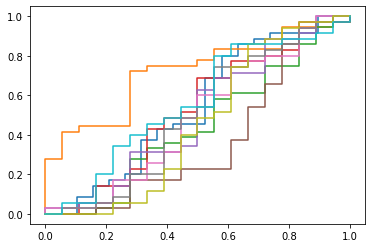

In [36]:
md.Logistic_model(data_pca,target)

Best n_neighbors = 14
Best weights = distance
Confusion Matrix
[[16  2]
 [ 3 33]]
Accuracy = 0.9074074074074074
Recall [Neg Pos] = 0.9166666666666666
Precision [Neg Pos] = 0.9428571428571428
F1 score [Neg Pos]  = 0.9295774647887323
AUC = 0.5616541353383459
Confusion Matrix
[[15  2]
 [ 3 34]]
Accuracy = 0.9074074074074074
Recall [Neg Pos] = 0.918918918918919
Precision [Neg Pos] = 0.9444444444444444
F1 score [Neg Pos]  = 0.9315068493150684
AUC = 0.6689814814814815
Confusion Matrix
[[16  3]
 [ 2 33]]
Accuracy = 0.9074074074074074
Recall [Neg Pos] = 0.9428571428571428
Precision [Neg Pos] = 0.9166666666666666
F1 score [Neg Pos]  = 0.9295774647887323
AUC = 0.47530864197530864
Confusion Matrix
[[13  1]
 [ 5 34]]
Accuracy = 0.8867924528301887
Recall [Neg Pos] = 0.8717948717948718
Precision [Neg Pos] = 0.9714285714285714
F1 score [Neg Pos]  = 0.9189189189189189
AUC = 0.5952380952380952
Confusion Matrix
[[16  1]
 [ 2 34]]
Accuracy = 0.9433962264150944
Recall [Neg Pos] = 0.9444444444444444
Precis

{'accuracy': 0.9288259958071279,
 'precision': 0.9661111111111111,
 'recall': 0.9298381348381348,
 'F1': 0.9472416874027909,
 'AUC': 0.5385309338160215}

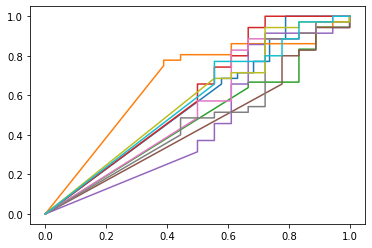

In [37]:
md.KNN_model(data_pca,target)

Best criterion = entropy
Best splitter = random
Confusion Matrix
[[16  1]
 [ 3 34]]
Accuracy = 0.9259259259259259
Recall [Neg Pos] = 0.918918918918919
Precision [Neg Pos] = 0.9714285714285714
F1 score [Neg Pos]  = 0.9444444444444445
AUC = 0.5
Confusion Matrix
[[17  6]
 [ 1 30]]
Accuracy = 0.8703703703703703
Recall [Neg Pos] = 0.967741935483871
Precision [Neg Pos] = 0.8333333333333334
F1 score [Neg Pos]  = 0.8955223880597015
AUC = 0.5
Confusion Matrix
[[17  7]
 [ 1 29]]
Accuracy = 0.8518518518518519
Recall [Neg Pos] = 0.9666666666666667
Precision [Neg Pos] = 0.8055555555555556
F1 score [Neg Pos]  = 0.8787878787878789
AUC = 0.5
Confusion Matrix
[[14  4]
 [ 4 31]]
Accuracy = 0.8490566037735849
Recall [Neg Pos] = 0.8857142857142857
Precision [Neg Pos] = 0.8857142857142857
F1 score [Neg Pos]  = 0.8857142857142857
AUC = 0.5
Confusion Matrix
[[17  3]
 [ 1 32]]
Accuracy = 0.9245283018867925
Recall [Neg Pos] = 0.9696969696969697
Precision [Neg Pos] = 0.9142857142857143
F1 score [Neg Pos]  = 0.9

{'accuracy': 0.9006638714185884,
 'precision': 0.9096031746031746,
 'recall': 0.9395973805627506,
 'F1': 0.9229032726035957,
 'AUC': 0.5}

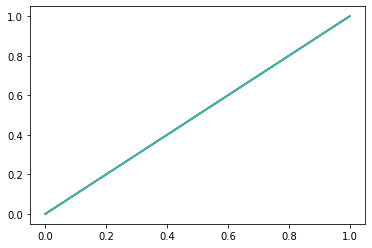

In [38]:
md.DT_model(data_pca,target)

Best C = 233.57214690901213
Best kernel = linear
Confusion Matrix
[[16  1]
 [ 3 34]]
Accuracy = 0.9259259259259259
Recall [Neg Pos] = 0.918918918918919
Precision [Neg Pos] = 0.9714285714285714
F1 score [Neg Pos]  = 0.9444444444444445
AUC = 0.5458646616541354
Confusion Matrix
[[16  1]
 [ 2 35]]
Accuracy = 0.9444444444444444
Recall [Neg Pos] = 0.9459459459459459
Precision [Neg Pos] = 0.9722222222222222
F1 score [Neg Pos]  = 0.9589041095890412
AUC = 0.6157407407407407
Confusion Matrix
[[15  3]
 [ 3 33]]
Accuracy = 0.8888888888888888
Recall [Neg Pos] = 0.9166666666666666
Precision [Neg Pos] = 0.9166666666666666
F1 score [Neg Pos]  = 0.9166666666666666
AUC = 0.4675925925925926
Confusion Matrix
[[15  0]
 [ 3 35]]
Accuracy = 0.9433962264150944
Recall [Neg Pos] = 0.9210526315789473
Precision [Neg Pos] = 1.0
F1 score [Neg Pos]  = 0.958904109589041
AUC = 0.5174603174603175
Confusion Matrix
[[16  1]
 [ 2 34]]
Accuracy = 0.9433962264150944
Recall [Neg Pos] = 0.9444444444444444
Precision [Neg Pos] 

{'accuracy': 0.926869322152341,
 'precision': 0.9603174603174602,
 'recall': 0.9316182281352561,
 'F1': 0.9454041035305872,
 'AUC': 0.46942773600668336}

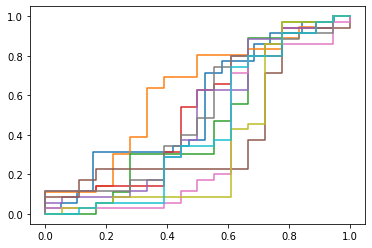

In [39]:
md.SVM_model(data_pca,target)

# Classification Test - Categorical Input Features

## Preprocessing

In [40]:
data = pd.read_csv('datasets/heart_failure.csv')

In [41]:
field_types_raw = pp.get_input_types(data)

Modeling with field specifications:
age: numeric
anaemia: categorical
creatinine_phosphokinase: numeric
diabetes: categorical
ejection_fraction: numeric
high_blood_pressure: categorical
platelets: numeric
serum_creatinine: numeric
serum_sodium: numeric
sex: categorical
smoking: categorical
time: numeric
DEATH_EVENT: categorical


In [42]:
field_types = pp.normalize_col_names(data,field_types_raw)

column name changes
age: age
anaemia: anaemia
creatinine_phosphokinase: creatinine_phosphokinase
diabetes: diabetes
ejection_fraction: ejection_fraction
high_blood_pressure: high_blood_pressure
platelets: platelets
serum_creatinine: serum_creatinine
serum_sodium: serum_sodium
sex: sex
smoking: smoking
time: time
DEATH_EVENT: death_event


In [43]:
target='death_event'

In [44]:
problem = pp.identify_problem_type(data,field_types,target)
print(problem)

classification


In [45]:
data_prop, field_types = pp.proper_dataframe(data,field_types,target,problem)

In [46]:
data_no_null,drop_cols = pp.handle_null_values(data_prop)

No null values found


In [47]:
data_norm = pp.normalisation(data_no_null,target,field_types)

In [48]:
count = pp.remove_outliers(data_norm,target,field_types)

In [49]:
print(count)

76


In [50]:
data_pca,n = pp.pca_df(data_norm,target,field_types)
print(n)

0


In [51]:
pp.save_final_df(data_pca,'heart_failure')

In [52]:
data_pca.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,death_event
0,1.192945,0.000166,-1.530560,0.016816,0.490057,-1.504036,-1.629502,1
1,0.350833,-0.449939,-1.530560,-1.038073,-0.090900,-1.731046,-1.590785,1
2,-0.912335,-0.486071,-1.530560,-0.546474,0.490057,0.085034,-1.590785,1
3,2.456114,-0.552141,0.162199,-0.607924,0.683709,-1.050016,-1.577879,1
4,1.192945,-0.346704,-1.953749,-1.396531,-0.187726,0.085034,-1.552067,1


## Modelling

Confusion Matrix
[[15  4]
 [ 1  3]]
Accuracy = 0.782608695652174
Recall [Neg Pos] = 0.75
Precision [Neg Pos] = 0.42857142857142855
F1 score [Neg Pos]  = 0.5454545454545454
AUC = 0.36607142857142855
Confusion Matrix
[[17  3]
 [ 0  3]]
Accuracy = 0.8695652173913043
Recall [Neg Pos] = 1.0
Precision [Neg Pos] = 0.5
F1 score [Neg Pos]  = 0.6666666666666666
AUC = 0.1568627450980392
Confusion Matrix
[[17  2]
 [ 0  4]]
Accuracy = 0.9130434782608695
Recall [Neg Pos] = 1.0
Precision [Neg Pos] = 0.6666666666666666
F1 score [Neg Pos]  = 0.8
AUC = 0.2058823529411765
Confusion Matrix
[[14  2]
 [ 2  4]]
Accuracy = 0.8181818181818182
Recall [Neg Pos] = 0.6666666666666666
Precision [Neg Pos] = 0.6666666666666666
F1 score [Neg Pos]  = 0.6666666666666666
AUC = 0.45833333333333337
Confusion Matrix
[[16  0]
 [ 0  6]]
Accuracy = 1.0
Recall [Neg Pos] = 1.0
Precision [Neg Pos] = 1.0
F1 score [Neg Pos]  = 1.0
AUC = 0.26041666666666663
Confusion Matrix
[[13  2]
 [ 3  4]]
Accuracy = 0.7727272727272727
Recall [Ne

{'accuracy': 0.8474308300395256,
 'precision': 0.6595238095238095,
 'recall': 0.7845238095238094,
 'F1': 0.7017249417249417,
 'AUC': 0.2905899859943977}

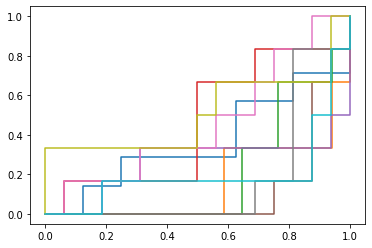

In [53]:
md.G_NB_measures(data_pca,target)